In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats

In [3]:
import datetime as dt
from datetime import datetime, date, time, timedelta
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Latest date
latest_date_query = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date = datetime.strptime(latest_date_query[0], '%Y-%m-%d').date()
print(latest_date)
date_one_year_ago = latest_date - relativedelta(months= 12)
print(date_one_year_ago)

2017-08-23
2016-08-23


In [11]:
# Query for 1 year precipitation data
one_year_prec_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= date_one_year_ago).all()
one_year_prec_data


[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [12]:
# Save query results in Pandas Dataframe
one_year_prec_data_df = pd.DataFrame(one_year_prec_data).set_index("date")
one_year_prec_data_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


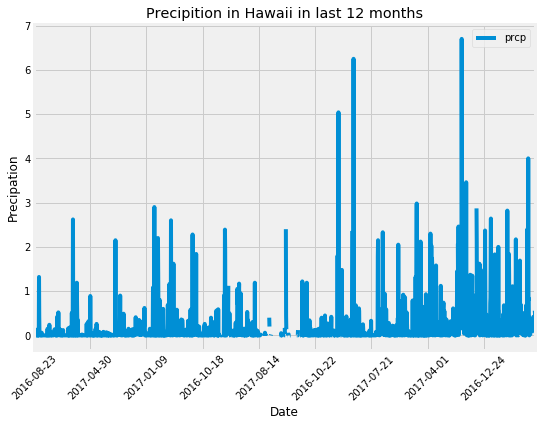

In [13]:
# Plot to to one year's precipitation data
one_year_prec_data_df.plot(figsize = (8,6), rot=45)
plt.ylabel('Precipation')
plt.xlabel('Date')
plt.title("Precipition in Hawaii in last 12 months")
plt.show()

In [14]:
# Statistics for all precipitation data
all_prec_data = engine.execute('SELECT date, prcp FROM measurement').fetchall()
all_prec_data_df = pd.DataFrame(all_prec_data)
all_prec_data_df.describe()

,1
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


In [16]:
########################    Station Analysis   #########################

In [17]:
# Number of Stations
no_of_stations = session.query(func.count(Station.station)).all()
no_of_stations

[(9)]

In [18]:
# List the stations and the counts in descending order
sel = [Measurement.station, func.count(Measurement.station), Station.name]
station_activity = session.query(*sel).\
    filter(Station.station == Measurement.station).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
station_activity

[('USC00519281', 2772, 'WAIHEE 837.5, HI US'),
 ('USC00519397', 2724, 'WAIKIKI 717.2, HI US'),
 ('USC00513117', 2709, 'KANEOHE 838.1, HI US'),
 ('USC00519523', 2669, 'WAIMANALO EXPERIMENTAL FARM, HI US'),
 ('USC00516128', 2612, 'MANOA LYON ARBO 785.2, HI US'),
 ('USC00514830', 2202, 'KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 ('USC00511918', 1979, 'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC00517948', 1372, 'PEARL CITY, HI US'),
 ('USC00518838', 511, 'UPPER WAHIAWA 874.3, HI US')]

In [19]:
# Lowest temperature, highest temperature and average temperature for most active station
select = [func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]
temp_stats_for_most_active_station = session.query(*select).\
    filter(Measurement.station == station_activity[0][0]).all()
temp_stats_for_most_active_station    

[(54.0, 85.0, 71.66378066378067)]

In [20]:
# List of temperatures for most active station in the past 12 months
temps_for_most_active_station = session.query(Measurement.tobs).\
    filter(Measurement.station == station_activity[0][0]).\
    filter(Measurement.date >= date_one_year_ago).all()
temps_list_results = list(np.ravel(temps_for_most_active_station))
temps_list_results

[77.0,
 77.0,
 80.0,
 80.0,
 75.0,
 73.0,
 78.0,
 77.0,
 78.0,
 80.0,
 80.0,
 78.0,
 78.0,
 78.0,
 73.0,
 74.0,
 80.0,
 79.0,
 77.0,
 80.0,
 76.0,
 79.0,
 75.0,
 79.0,
 78.0,
 79.0,
 78.0,
 78.0,
 76.0,
 74.0,
 77.0,
 78.0,
 79.0,
 79.0,
 77.0,
 80.0,
 78.0,
 78.0,
 78.0,
 77.0,
 79.0,
 79.0,
 79.0,
 79.0,
 75.0,
 76.0,
 73.0,
 72.0,
 71.0,
 77.0,
 79.0,
 78.0,
 79.0,
 77.0,
 79.0,
 77.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 74.0,
 75.0,
 76.0,
 73.0,
 76.0,
 74.0,
 77.0,
 76.0,
 76.0,
 74.0,
 75.0,
 75.0,
 75.0,
 75.0,
 71.0,
 63.0,
 70.0,
 68.0,
 67.0,
 77.0,
 74.0,
 77.0,
 76.0,
 76.0,
 75.0,
 76.0,
 75.0,
 73.0,
 75.0,
 73.0,
 75.0,
 74.0,
 75.0,
 74.0,
 75.0,
 73.0,
 75.0,
 73.0,
 73.0,
 74.0,
 70.0,
 72.0,
 70.0,
 67.0,
 67.0,
 69.0,
 70.0,
 68.0,
 69.0,
 69.0,
 66.0,
 65.0,
 68.0,
 62.0,
 75.0,
 70.0,
 69.0,
 76.0,
 76.0,
 74.0,
 73.0,
 71.0,
 74.0,
 74.0,
 72.0,
 71.0,
 72.0,
 74.0,
 69.0,
 67.0,
 72.0,
 70.0,
 64.0,
 63.0,
 63.0,
 62.0,
 70.0,
 70.0,
 62.0,
 62.0,
 63.0,
 65.0,

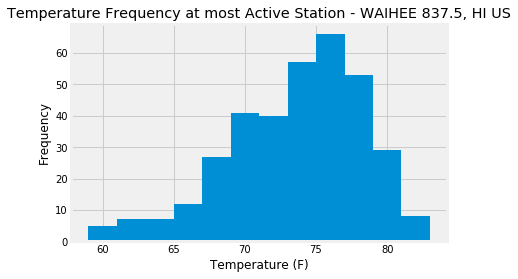

In [21]:
# Histogram to show temperatures for most active station in the past 12 months
plt.hist(temps_list_results, bins=12)
plt.xlabel("Temperature (F)")
plt.ylabel("Frequency")
plt.title("Temperature Frequency at most Active Station" + " - " + station_activity[0][2])
plt.show()

In [22]:
####################      Temperature Analysis I        ##########################

In [23]:
# Comparing temperatures between June and December
june_str = "06"
december_str = "12"
june_temperatures = session.query(Measurement.tobs).filter(func.strftime("%m", Measurement.date) == june_str).all()
june_avg_temp = session.query(func.avg(Measurement.tobs)).filter(func.strftime("%m", Measurement.date) == june_str).all()
print(f"June Average Temperature:  {june_avg_temp[0][0]}")
december_temperatures = session.query(Measurement.tobs).filter(func.strftime("%m", Measurement.date) == december_str).all()
december_avg_temp = session.query(func.avg(Measurement.tobs)).filter(func.strftime("%m", Measurement.date) == december_str).all()
print(f"December Average Temperature:  {december_avg_temp[0][0]}")
print("--------------------------------------------------------")
print(stats.ttest_ind(june_temperatures, december_temperatures, equal_var=False))
print("The temperatures is June and December is Hawaii have no statistical significance.")
print("The T-Test used is an Unpaired T-Test because the two temperatures are independent of each other.")

June Average Temperature:  74.94411764705882
December Average Temperature:  71.04152933421226
--------------------------------------------------------
Ttest_indResult(statistic=array([31.35503692]), pvalue=array([4.19352984e-187]))
The temperatures is June and December is Hawaii have no statistical significance.
The T-Test used is an Unpaired T-Test because the two temperatures are independent of each other.


In [24]:
###############      Temperature Analysis II        ##########################

In [25]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [26]:
calc_temps('2016-10-28', '2016-11-05')

[(68.0, 75.85964912280701, 79.0)]

Trip dates 10/28 to 11/05


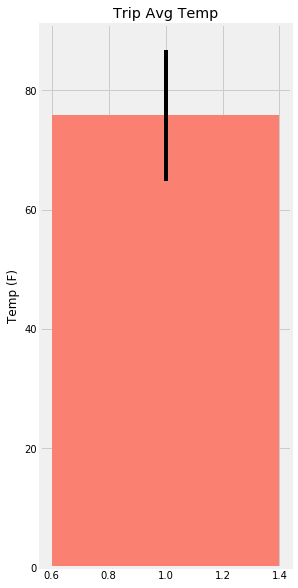

In [27]:
# Temperature Min, Max, and Avg for range of trip dates
# Trip dates chosen below
print("Trip dates 10/28 to 11/05")
trip_start_date = datetime.strptime("2016-10-28", "%Y-%m-%d").date()
trip_end_date = datetime.strptime("2016-11-05", "%Y-%m-%d").date()

avg_temp = calc_temps(trip_start_date, trip_end_date)[0][1]
min_temp = calc_temps(trip_start_date, trip_end_date)[0][0]
max_temp = calc_temps(trip_start_date, trip_end_date)[0][2]

# create bar graph
plt.figure(figsize=(4,10))
plt.title("Trip Avg Temp")
plt.ylabel("Temp (F)")
plt.bar(1, avg_temp, yerr = (max_temp - min_temp), color="salmon")
plt.show()

In [28]:
###############      Daily Rainfall Average        ##########################

In [29]:
# Trip dates chosen below
print("Trip dates 10/28 to 11/05")

Trip dates 10/28 to 11/05


In [30]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
sel = [Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation]
station_rainfall = session.query(*sel).\
    filter(Station.station == Measurement.station).\
    filter(Measurement.date >= trip_start_date).\
    filter(Measurement.date <= trip_end_date).\
    group_by(Measurement.station).\
    order_by(func.sum(Measurement.prcp).desc()).all()
station_rainfall_df = pd.DataFrame(station_rainfall)
station_rainfall_df

,station,name,latitude,longitude,elevation
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
1,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
4,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
5,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
6,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9


## Optional Challenge Assignment

In [31]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

    return (session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
            filter(func.strftime("%m-%d", Measurement.date) == date).all())[0]
                
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [32]:
# Trip dates chosen below
print("Trip dates 10/28 to 11/05")
trip_start_date = datetime.strptime("2016-10-28", "%Y-%m-%d").date()
trip_end_date = datetime.strptime("2016-11-05", "%Y-%m-%d").date()

Trip dates 10/28 to 11/05


In [33]:
# Temperature daily normals dictionary for trip dates\n",
def trip_dates(trip_start_date, trip_end_date):

    start_date = datetime.strptime(trip_start_date, "%Y-%m-%d")
    end_date = datetime.strptime(trip_end_date, "%Y-%m-%d")
    date_array = (start_date + timedelta(days=x) for x in range(0, 1 + (end_date - start_date).days))

    dates_list = []
    for date in date_array:
        dates_list.append(date.strftime("%Y-%m-%d"))

    daily_dates = []
    for day in dates_list:
        daily_dates.append(day.split("-")[1] + "-" + day.split("-")[2])

    list_of_daily_normals = []
    for d in daily_dates:
        list_of_daily_normals.append(daily_normals(d))
    

    min_temp = []
    avg_temp = []
    max_temp = []

    for normal in list_of_daily_normals:      
        min_temp.append(normal[0][0])
        avg_temp.append(normal[0][1])
        max_temp.append(normal[0][2])

    temp_dict = {"Date": daily_dates,
                 "Minimum Temperature": min_temp,
                 "Average Temperature": avg_temp,
                 "Maximum Temperature": max_temp}

    return temp_dict

In [34]:
trip_dates("2019-10-28", "2019-11-05")

{'Date': ['10-28',
  '10-29',
  '10-30',
  '10-31',
  '11-01',
  '11-02',
  '11-03',
  '11-04',
  '11-05'],
 'Minimum Temperature': [68.0, 68.0, 64.0, 67.0, 65.0, 64.0, 66.0, 65.0, 64.0],
 'Average Temperature': [74.75471698113208,
  74.88679245283019,
  74.66,
  74.83673469387755,
  74.86274509803921,
  74.0625,
  74.95918367346938,
  74.0754716981132,
  73.5576923076923],
 'Maximum Temperature': [82.0, 81.0, 81.0, 80.0, 83.0, 81.0, 82.0, 82.0, 78.0]}

In [35]:
# Trip Daily Normals in Pandas DataFrame
trip_daily_normals_df = pd.DataFrame(trip_dates('2019-10-28', '2019-11-05')).set_index("Date")
trip_daily_normals_df

,Minimum Temperature,Average Temperature,Maximum Temperature
Date,,,
10-28,68.0,74.754717,82.0
10-29,68.0,74.886792,81.0
10-30,64.0,74.660000,81.0
10-31,67.0,74.836735,80.0
11-01,65.0,74.862745,83.0
11-02,64.0,74.062500,81.0
11-03,66.0,74.959184,82.0
11-04,65.0,74.075472,82.0
11-05,64.0,73.557692,78.0


Text(0, 0.5, 'Temp (F)')

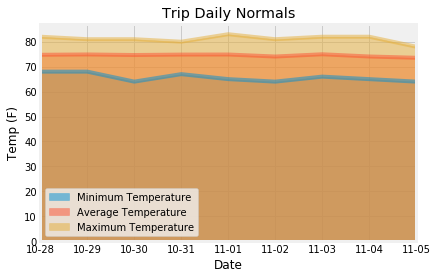

In [36]:
# Stcked area plot for daily normals
trip_daily_normals_df.plot.area(stacked=False)
plt.title("Trip Daily Normals")
plt.ylabel("Temp (F)")